Training Data found: 397
Evaluation Data found: 278


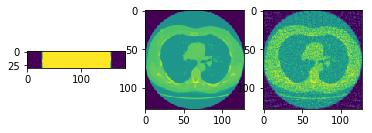

In [14]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from forward_models import ct
from forward_models import denoising

from data_pips import BSDS

from Framework import adversarial_regulariser
from Framework import positiv_adversarial_regulariser
from Framework import postprocessing
from Framework import iterative_scheme
from Framework import total_variation
from Framework import generic_framework

import util as ut

from networks import multiscale_l1_classifier

class ge_with_noise(generic_framework):
    noise_level = 0.02
ge = ge_with_noise()
y, x_true, fbp = ge.generate_training_data(batch_size=1)

y = ut.cut_image(y)
fbp = ut.cut_image(fbp)
plt.figure()
plt.subplot(131)
plt.imshow(y[0,...,0])
plt.subplot(132)
plt.imshow(x_true[0,...,0])
plt.subplot(133)
plt.imshow(fbp[0,...,0])
plt.show()

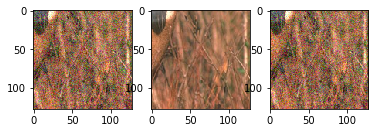

In [22]:
y, x_true, fbp = adv_reg.generate_training_data(1)
y = ut.cut_image(y)
fbp = ut.cut_image(fbp)
plt.figure()
plt.subplot(131)
plt.imshow(y[0,...])
plt.subplot(132)
plt.imshow(x_true[0,...])
plt.subplot(133)
plt.imshow(fbp[0,...])
plt.show()
print(ut.l2_norm(y-x_true))

C:\Users\Seb\Anaconda3\envs\rootclone\lib\site-packages\matplotlib\__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
glob3.get_shape().as_list()

[None, 128, 128, 16]

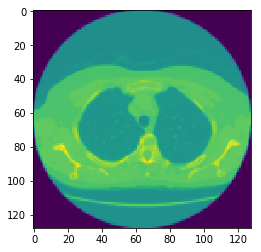

237
0


In [18]:
path = pp.get_random_path()
image = pp.get_pic(path)
plt.figure()
plt.imshow(image)
plt.show()
print(np.amax(image))
print(np.amin(image))

In [4]:
import odl.contrib.tensorflow as tf

print(tf.__file__)
import odl
print(odl.__version__)

C:\Users\Seb\Anaconda3\envs\rootclone\lib\site-packages\odl\contrib\tensorflow\__init__.py
0.6.1.dev0


In [16]:
import tensorflow as tf
from util import lrelu
### resnet architectures
def apply_conv(x, filters=32, kernel_size=3):
    return tf.layers.conv2d(x, filters=filters, kernel_size=kernel_size, padding='SAME',
                            kernel_initializer=tf.contrib.layers.variance_scaling_initializer(),
                            activation=lrelu)

def resblock(x, filters):
    with tf.name_scope('resblock_bn'):
        x = tf.identity(x)
        update = apply_conv(x, filters=filters)
        update = apply_conv(update, filters=filters)

        skip = tf.layers.conv2d(x, filters=filters, kernel_size=1, padding='SAME',
                                kernel_initializer=tf.contrib.layers.variance_scaling_initializer())
        return skip + update
    
def meanpool(x):
    with tf.name_scope('meanpool'):
        x = tf.identity(x)
        return tf.add_n([x[:, ::2, ::2, :], x[:, 1::2, ::2, :],
                         x[:, ::2, 1::2, :], x[:, 1::2, 1::2, :]]) / 4.

In [29]:
import tensorflow as tf
sess = tf.InteractiveSession
pic = tf.placeholder(shape=[None, 128, 128, 1],
                             dtype=tf.float32)
with tf.name_scope('pre_process'):
    x = apply_conv(pic, filters=64, kernel_size=3)

with tf.name_scope('x1'):
    x = resblock(x, 64)

with tf.name_scope('x2'):
    x = resblock(meanpool(x), filters=64)  # 1/2

with tf.name_scope('x3'):
    x = resblock(meanpool(x), filters=128)  # 1/4

with tf.name_scope('x4'):
    x = resblock(meanpool(x), filters=256)  # 1/8


with tf.name_scope('post_process'):
    flat = tf.contrib.layers.flatten(x)
    flat = tf.layers.dense(flat, 1)

In [30]:
x.get_shape().as_list()

[None, 16, 16, 256]